In [ ]:
#importing libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
label=pd.read_excel(r'/content/drive/MyDrive/training_label.xlsx')

In [ ]:
label.head()

,image,class,extent_of_damage,subset
0,image/0.jpeg,"dent, head_lamp",3,Training
1,image/1.jpeg,head_lamp,1,Training
2,image/2.jpeg,scratch,1,Training
3,image/3.jpeg,head_lamp,1,Training
4,image/4.jpeg,unknown,0,Training


In [ ]:
label['image']=label['image'].replace('image/','',regex=True)

In [ ]:
label.head()

,image,class,extent_of_damage,subset
0,0.jpeg,"dent, head_lamp",3,Training
1,1.jpeg,head_lamp,1,Training
2,2.jpeg,scratch,1,Training
3,3.jpeg,head_lamp,1,Training
4,4.jpeg,unknown,0,Training


In [ ]:
print('The shape of the data set is:',label.shape)

The shape of the data set is: (801, 4)


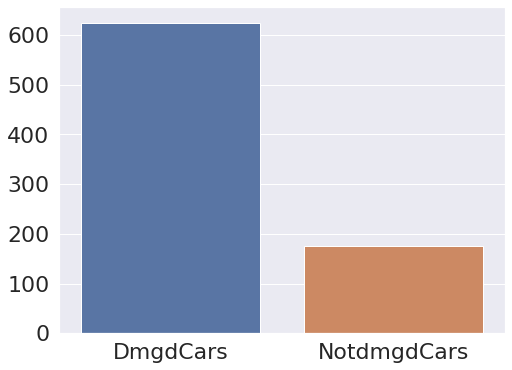

In [ ]:
import seaborn as sns
ndamcar=label[label['extent_of_damage']==0]['image'].count()
ndamcar
damcar=len(label)-ndamcar
dcar={'DmgdCars':damcar, 'NotdmgdCars' :ndamcar}
plt.figure(figsize=(8,6))
sns.barplot(list(dcar.keys()),list(dcar.values()))
plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb_result = mlb.fit_transform([str(label.loc[i,'class']).split(',') for i in range(len(label))])
label = pd.concat([label,pd.DataFrame(mlb_result,columns=list(mlb.classes_))],axis=1)
label.head()

,image,class,extent_of_damage,subset,head_lamp,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.jpeg,"dent, head_lamp",3,Training,1,1,0,0,0,0,0
1,1.jpeg,head_lamp,1,Training,0,0,0,1,0,0,0
2,2.jpeg,scratch,1,Training,0,0,0,0,1,0,0
3,3.jpeg,head_lamp,1,Training,0,0,0,1,0,0,0
4,4.jpeg,unknown,0,Training,0,0,0,0,0,0,1


In [ ]:
label['head_lamp']=label['head_lamp']+label[' head_lamp']
label=label.drop([' head_lamp'],axis=1)
label.head()

,image,class,extent_of_damage,subset,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.jpeg,"dent, head_lamp",3,Training,1,0,1,0,0,0
1,1.jpeg,head_lamp,1,Training,0,0,1,0,0,0
2,2.jpeg,scratch,1,Training,0,0,0,1,0,0
3,3.jpeg,head_lamp,1,Training,0,0,1,0,0,0
4,4.jpeg,unknown,0,Training,0,0,0,0,0,1


Text(0.5, 0, 'Damage Labels')

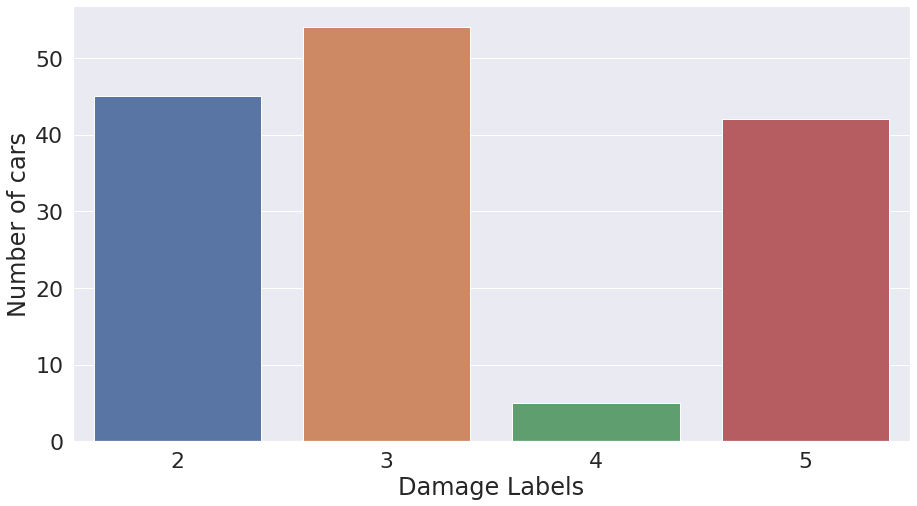

In [ ]:
rowSums = label.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.ylabel('Number of cars')
plt.xlabel('Damage Labels')

In [ ]:
label.drop(['subset','extent_of_damage'],inplace=True,axis=1)

In [ ]:
label.head()

,image,class,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.jpeg,"dent, head_lamp",1,0,1,0,0,0
1,1.jpeg,head_lamp,0,0,1,0,0,0
2,2.jpeg,scratch,0,0,0,1,0,0
3,3.jpeg,head_lamp,0,0,1,0,0,0
4,4.jpeg,unknown,0,0,0,0,0,1


In [ ]:
label.isnull().sum()

image            0
class            0
dent             0
glass_shatter    0
head_lamp        0
scratch          0
tail_lamp        0
unknown          0
dtype: int64

### There are no null Values in the data


In [ ]:
label['class'].unique()

array(['dent, head_lamp', 'head_lamp', 'scratch', 'unknown',
       'dent,head_lamp', 'glass_shatter', 'tail_lamp', 'dent',
       'dent,scratch', 'head_lamp,glass_shatter,dent,scratch,tail_lamp',
       'head_lamp,dent', 'glass_shatter,dent,scratch',
       'head_lamp,dent,scratch', 'head_lamp,dent,scratch,glass_shatter',
       'tail_lamp,scratch', 'dent,scratch,glass_shatter', 'scratch,dent',
       'head_lamp,scratch,dent', 'tail_lamp,scratch,dent',
       'tail_lamp,dent,scratch', 'head_lamp,scratch', 'tail_lamp,dent',
       'glass_shatter,dent', 'head_lamp,scratch,dent,glass_shatter'],
      dtype=object)

In [ ]:
label['class'].nunique()

24

In [ ]:
all_labels = [item for sublist in list(label['class'].apply(lambda row: row.split(",")).values) for item in sublist]

In [ ]:
def unique(list_in):
   unq_list = []

   for x in list_in:
      if x not in unq_list:
         unq_list.append(x)
   return unq_list

for l in range(len(all_labels)):
  if all_labels[l]==' head_lamp':
    all_labels[l]='head_lamp'

print("Labels values from the list is:",len(unique(all_labels)))
print("The labels are:",unique(all_labels))

Labels values from the list is: 6
The labels are: ['dent', 'head_lamp', 'scratch', 'unknown', 'glass_shatter', 'tail_lamp']


In [ ]:
labels_count = pd.DataFrame({'class': all_labels}).groupby('class').size().reset_index().sort_values(0, ascending=False)
labels_count.rename(columns={ labels_count.columns[1]: "No.of Images" }, inplace = True)
labels_count.reset_index(inplace=True,drop=True)
labels_count.head()

,class,No.of Images
0,dent,283
1,scratch,259
2,unknown,185
3,head_lamp,168
4,glass_shatter,132


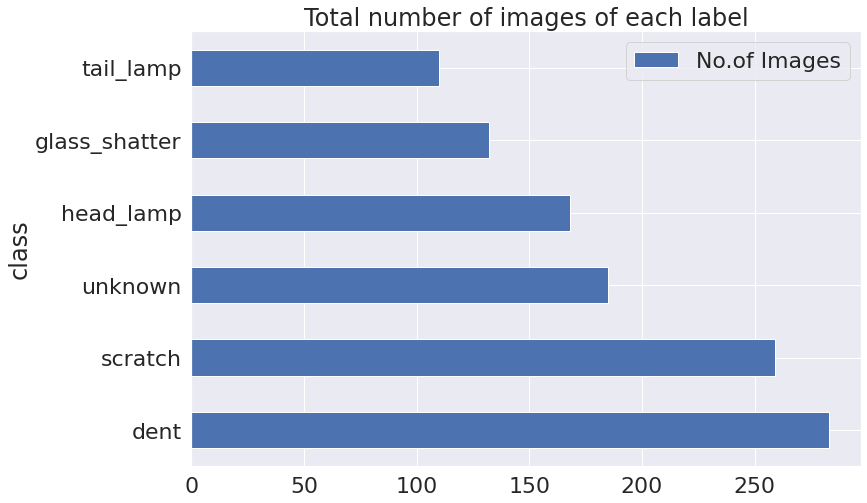

In [ ]:
labels_count.plot.barh(x='class', y='No.of Images', figsize=(12,8))
plt.title('Total number of images of each label')
plt.show()

In [ ]:
label.head()

,image,class,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.jpeg,"dent, head_lamp",1,0,1,0,0,0
1,1.jpeg,head_lamp,0,0,1,0,0,0
2,2.jpeg,scratch,0,0,0,1,0,0
3,3.jpeg,head_lamp,0,0,1,0,0,0
4,4.jpeg,unknown,0,0,0,0,0,1


In [ ]:

label['class']=label['class'].str.split(',')
#label[['class1','class2','class3','class4','class5','class6']] = label['class'].str.split(',', expand=True)

label.tail()

,image,class,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
796,796.jpeg,[unknown],0,0,0,0,0,1
797,797.jpeg,[head_lamp],0,0,1,0,0,0
798,798.jpeg,[unknown],0,0,0,0,0,1
799,799.jpeg,[dent],1,0,0,0,0,0
800,800.jpeg,[head_lamp],0,0,1,0,0,0


In [ ]:
data=[]
train_path='/content/drive/MyDrive/4.Train'
for i in range(len(os.listdir(train_path))-1):
  path=os.path.join(train_path,label['image'][i])
  img=cv2.imread(path)
  data.append(img)

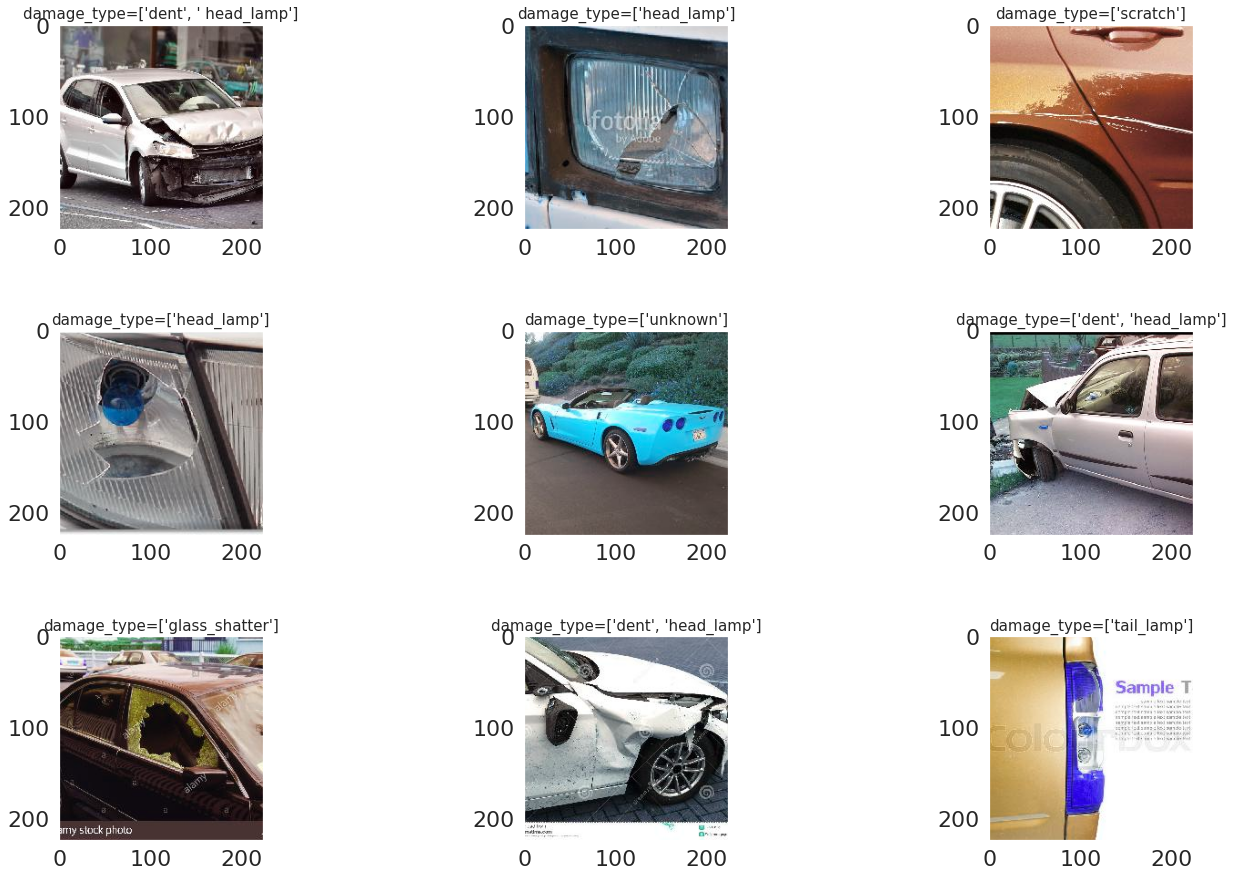

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (25, 15))
fig.subplots_adjust(hspace = .5, wspace=.0001)
for i in range (0,9):
  ax = fig.add_subplot(3, 3, i+1)
  ax.set_title(f"damage_type={label['class'][i]}",size=15)
  ax.grid(False)
  ax.imshow(data[i])


In [ ]:
label.drop(['image','class'],axis=1,inplace=True)

label.head()

,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,1,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,1


In [ ]:
X = np.array(data)

In [ ]:
out_col=label.columns
Y=label.to_numpy()

In [ ]:
X.shape

(801, 224, 224, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train1, X_test, y_train1, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1, random_state=42)


In [ ]:
#create a datagenrator
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")


In [ ]:
#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import tensorflow as tf
import keras

base_model = keras.applications.vgg16.VGG16( 
    # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3), # VGG16 expects min 32 x 32
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

activation =  tf.keras.activations.sigmoid #None  # tf.keras.activations.sigmoid or softmax

initializer = tf.keras.initializers.GlorotUniform(seed=42)

x=keras.layers.Dense(256,kernel_initializer=initializer,activation=tf.keras.activations.relu)(x)
x=keras.layers.Dropout(0.5)(x)


x=keras.layers.Dense(128,kernel_initializer=initializer,activation=tf.keras.activations.relu)(x)
x=keras.layers.Dropout(0.1)(x)

initializer = tf.keras.initializers.GlorotUniform(seed=42)


outputs = keras.layers.Dense(6,
                             kernel_initializer=initializer,
                             activation=activation)(x) 

model = keras.Model(inputs, outputs)

In [ ]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(), # default from_logits=False
              metrics=[keras.metrics.BinaryAccuracy()])


In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_10  (None, 512)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 dropout_20 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                          

In [ ]:
H = model.fit(
	x=aug.flow(X_train, y_train, batch_size=8),
	validation_data=(X_val, y_val),
	steps_per_epoch=len(X_train) // 8,
	epochs=50)

Epoch 1/50
72/72 [==============================] - 8s 104ms/step - loss: 1.0059 - get_f1: 0.3651 - val_loss: 0.4054 - val_get_f1: 0.4711
Epoch 2/50
72/72 [==============================] - 7s 101ms/step - loss: 0.5136 - get_f1: 0.4504 - val_loss: 0.3287 - val_get_f1: 0.5631
Epoch 3/50
72/72 [==============================] - 7s 100ms/step - loss: 0.4706 - get_f1: 0.5118 - val_loss: 0.3352 - val_get_f1: 0.6029
Epoch 4/50
72/72 [==============================] - 7s 101ms/step - loss: 0.4224 - get_f1: 0.5499 - val_loss: 0.2918 - val_get_f1: 0.6115
Epoch 5/50
72/72 [==============================] - 7s 101ms/step - loss: 0.3740 - get_f1: 0.6050 - val_loss: 0.3095 - val_get_f1: 0.5508
Epoch 6/50
72/72 [==============================] - 9s 119ms/step - loss: 0.3855 - get_f1: 0.5851 - val_loss: 0.2855 - val_get_f1: 0.6447
Epoch 7/50
72/72 [==============================] - 9s 127ms/step - loss: 0.3748 - get_f1: 0.6184 - val_loss: 0.2866 - val_get_f1: 0.6820
Epoch 8/50
72/72 [================

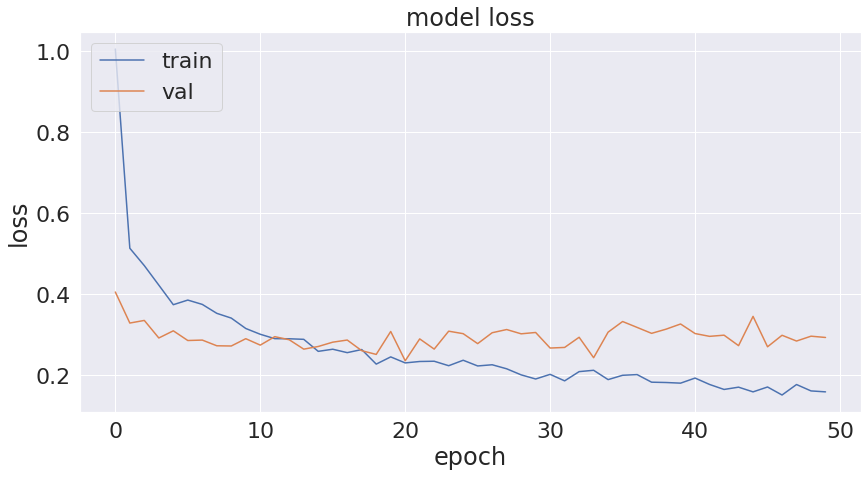

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

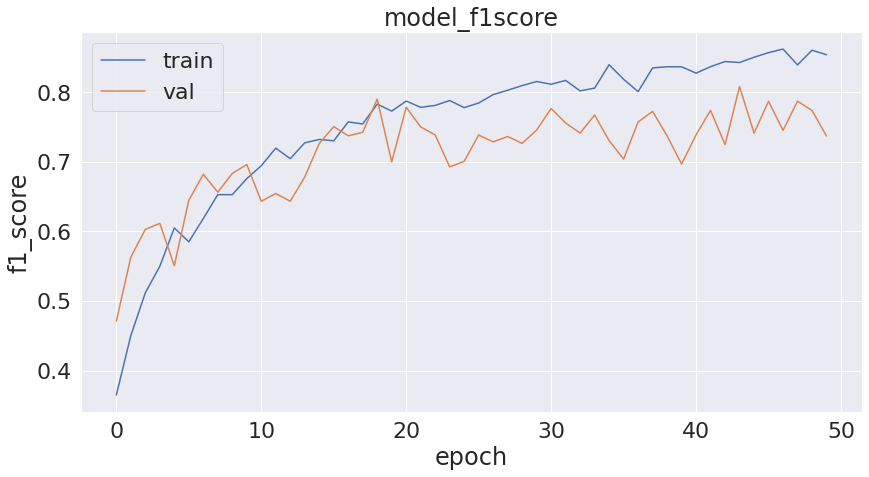

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(H.history['get_f1'])
plt.plot(H.history['val_get_f1'])
plt.title('model_f1score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_hat = model.predict(X_test)

pred_hat=[]
for y in y_hat:
  x=np.rint(y[:6])
  #damage=list(y[6:])
  #x=np.concatenate((x,[damage.index(max(damage))]))
  pred_hat.append(x)


pred_hat = np.array(pred_hat)

print(classification_report(y_test , pred_hat , target_names=['dent' , 'glass shatter' , 'head lamp' ,'scartch ','tail lamp' , 'unknown']))

               precision    recall  f1-score   support

         dent       0.78      0.76      0.77        62
glass shatter       0.76      0.89      0.82        18
    head lamp       0.67      0.81      0.73        32
     scartch        0.73      0.56      0.64        48
    tail lamp       0.92      0.63      0.75        19
      unknown       0.83      0.89      0.86        38

    micro avg       0.77      0.75      0.76       217
    macro avg       0.78      0.76      0.76       217
 weighted avg       0.77      0.75      0.75       217
  samples avg       0.74      0.75      0.74       217



In [ ]:
def predict(n,out_col,pred,X_test):
  output=pred[n]
  out_img=X_test[n]

  ans=[]
  for i in range(len(output)):
    if(output[i]==1):
      ans.append(out_col[i])

  return ans,out_img

In [ ]:
ans_hat=[]
out_img_hat=[]

for i in range(len(y_hat)):
  x,y = predict(i,out_col,pred_hat,X_test)
  ans_hat.append(x)
  out_img_hat.append(y)


In [ ]:
y_ori=[]
out_ori=[]

for i in range(len(y_hat)):
  x,y = predict(i,out_col,y_test,X_test)
  y_ori.append(x)
  #out_img_hat.append(y)



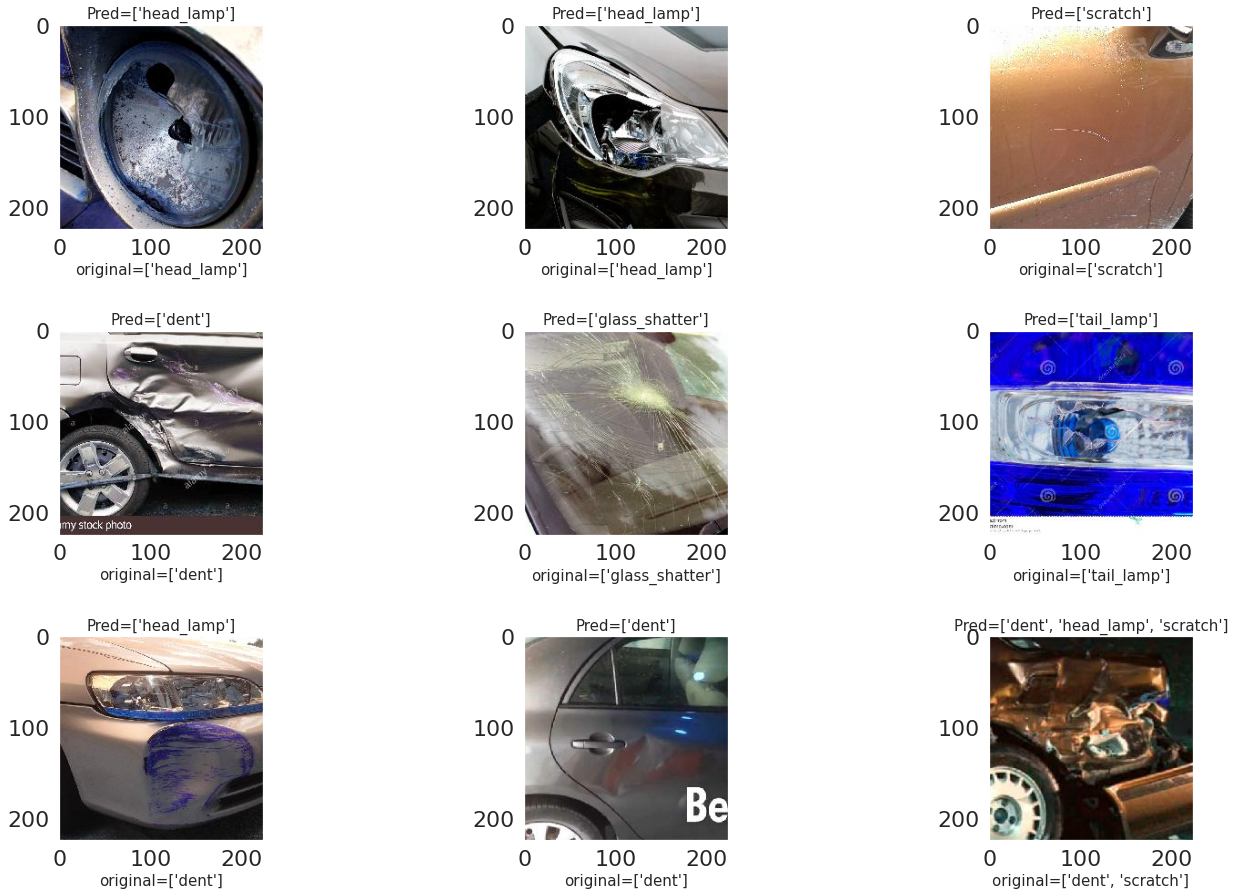

In [ ]:
fig = plt.figure(figsize= (25, 15))
fig.subplots_adjust(hspace = .5, wspace=.0001)
for i in range (0,9):
  # required nrows=4, required ncoms=4, index_location= i+1
  ax = fig.add_subplot(3, 3, i+1)
  # x_batch[i]: Image object at each iteration
  ax.set_title(f"Pred={ans_hat[i]}",size=15)
  ax.set_xlabel(f"original={y_ori[i]}",size=15)
  ax.grid(False)
  ax.imshow(out_img_hat[i])


In [ ]:
#model.save('final_damage.h5')

In [ ]:
import re
test_path='/content/drive/MyDrive/4.Test'
col_name=os.listdir(test_path)
col_name.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
test_data=[]
for i in range(len(os.listdir(test_path))):
  path=os.path.join(test_path,col_name[i])
  img=cv2.imread(path)
  test_data.append(img)

In [ ]:
test=np.array(test_data)
test_out=model.predict(test)

In [ ]:
pred_test=[]
for y in test_out:
  x=np.rint(y[:6])
  #damage=list(y[6:])
  #x=np.concatenate((x,[damage.index(max(damage))]))
  pred_test.append(x)

In [ ]:
len(pred_test)

300

In [ ]:
def predict(n,out_col,pred,X_test):
  output=pred[n]
  out_img=X_test[n]

  ans=[]
  for i in range(len(output)):
    if(output[i]==1):
      ans.append(out_col[i])

  return ans,out_img

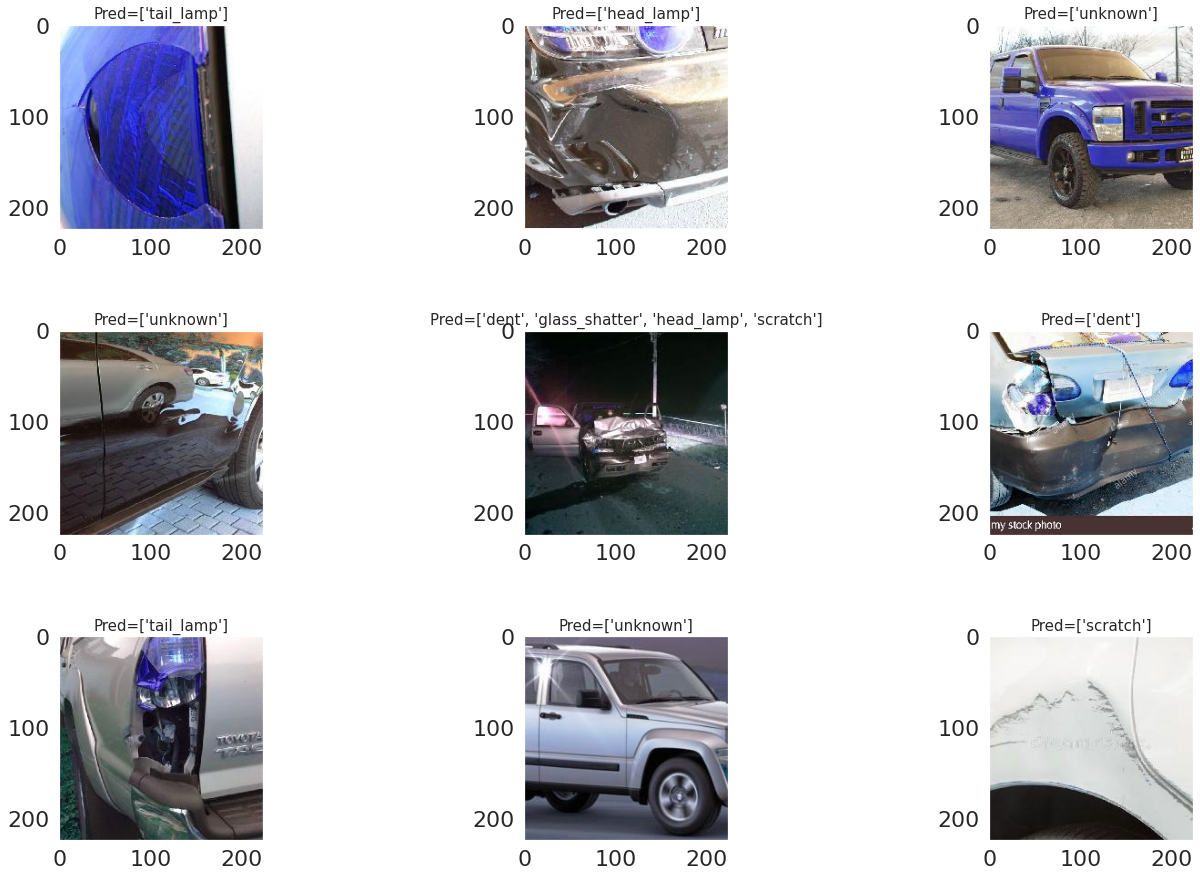

In [ ]:
ans=[]
out_img=[]

for i in range(300):
  x,y = predict(i,out_col,pred_test,test)
  ans.append(x)
  out_img.append(y)

fig = plt.figure(figsize= (25, 15))
fig.subplots_adjust(hspace = .5, wspace=.0001)
for i in range (0,9):
  # required nrows=4, required ncoms=4, index_location= i+1
  ax = fig.add_subplot(3, 3, i+1)
  # x_batch[i]: Image object at each iteration
  ax.set_title(f"Pred={ans[i]}",size=15)
  ax.grid(False)
  ax.imshow(out_img[i])


In [ ]:
df=pd.DataFrame(pred_test,columns=out_col)

In [ ]:
df.head()

,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
df['sum']=df['dent']+df['glass_shatter']+df['head_lamp']+df['scratch']+df['tail_lamp']+df['unknown']

In [ ]:
df.head()

,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown,sum
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,0.0,4.0


In [ ]:
df['sum'].value_counts()

1.0    255
3.0     13
2.0     11
0.0      9
4.0      8
5.0      4
Name: sum, dtype: int64

In [ ]:
df_final=df.drop('sum',axis=1)

df_img_names = pd.DataFrame(col_name, columns = ['image'] )
final_df=pd.concat([df_img_names,df_final],axis=1)
final_df['image'] = 'image/' + final_df['image'].astype(str)

In [ ]:
final_df.head()

,image,dent,glass_shatter,head_lamp,scratch,tail_lamp,unknown
0,image/801.jpeg,0.0,0.0,0.0,0.0,1.0,0.0
1,image/802.jpeg,0.0,0.0,1.0,0.0,0.0,0.0
2,image/803.jpeg,0.0,0.0,0.0,0.0,0.0,1.0
3,image/804.jpeg,0.0,0.0,0.0,0.0,0.0,1.0
4,image/805.jpeg,1.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
final_df.to_csv('damage_submission1.csv', index=False)